# Requirements

In [284]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [285]:
import pandas as pd

from useful_fuctions.k1 import label_encoder

# Write your code here. Add as many boxes as you need.
df = pd.read_csv("/Users/gorazdfilipovski/PycharmProjects/VNP/LABS/lab2/15.11-mental_health/mental_health_diagnosis_treatment_data.csv")
df.sample(5)

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
82,83,33.0,Male,Panic Disorder,8,6,7,8.0,SSRIs,Mindfulness-Based Therapy,2024-01-18,10,NaN,Improved,8,Depressed,63
267,268,52.0,Female,Panic Disorder,8,6,4,3.0,Anxiolytics,Cognitive Behavioral Therapy,2024-04-09,13,10.0,Improved,9,Happy,77
155,156,NaN,Female,Generalized Anxiety,7,3,7,NaN,Antidepressants,Mindfulness-Based Therapy,2024-03-24,12,NaN,No Change,7,Excited,66
4,5,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63
88,89,56.0,Female,Panic Disorder,9,7,9,10.0,SSRIs,Cognitive Behavioral Therapy,2024-03-18,10,7.0,No Change,10,Excited,79


In [286]:
df.isnull().sum()

Patient ID                        0
Age                              25
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Start Date              0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

Preprocess the input and the output variables appropriately.

In [287]:
df.groupby("Patient ID").size().max()

1

In [288]:
df.groupby("Treatment Start Date").size().max()

13

In [289]:
df.drop(columns=["Patient ID","Treatment Start Date"],inplace=True)

In [290]:
# Write your code here. Add as many boxes as you need.
def grouped_corr(df: pd.DataFrame):
    for cat in df.select_dtypes(include=['object', 'category']):
        for num in df.select_dtypes(include=['number']):
            print(df.groupby(cat)[num].mean())
            print()


In [291]:
grouped_corr(df)

Gender
Female    39.242152
Male      38.075397
Name: Age, dtype: float64

Gender
Female    7.611111
Male      7.360902
Name: Symptom Severity (1-10), dtype: float64

Gender
Female    5.581197
Male      5.394737
Name: Mood Score (1-10), dtype: float64

Gender
Female    6.658120
Male      6.308271
Name: Sleep Quality (1-10), dtype: float64

Gender
Female    5.148325
Male      5.385892
Name: Physical Activity (hrs/week), dtype: float64

Gender
Female    12.076923
Male      12.139098
Name: Treatment Duration (weeks), dtype: float64

Gender
Female    7.535912
Male      7.593607
Name: Stress Level (1-10), dtype: float64

Gender
Female    7.341880
Male      7.518797
Name: Treatment Progress (1-10), dtype: float64

Gender
Female    75.688034
Male      75.248120
Name: Adherence to Treatment (%), dtype: float64

Diagnosis
Bipolar Disorder             38.666667
Generalized Anxiety          40.669291
Major Depressive Disorder    38.347107
Panic Disorder               36.457944
Name: Age, dtype: fl

In [292]:
df

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,12,5.0,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,Male,Generalized Anxiety,10,4,8,NaN,Mood Stabilizers,Dialectical Behavioral Therapy,8,NaN,Improved,10,Depressed,73
496,22.0,Male,Panic Disorder,5,6,6,7.0,Benzodiazepines,Mindfulness-Based Therapy,13,6.0,Deteriorated,8,Happy,86
497,23.0,Male,Major Depressive Disorder,7,3,4,NaN,Antidepressants,Cognitive Behavioral Therapy,10,NaN,Deteriorated,5,Neutral,87
498,48.0,Male,Bipolar Disorder,9,4,6,9.0,Antidepressants,Mindfulness-Based Therapy,10,6.0,Improved,7,Anxious,73


In [293]:
df.isnull().sum()

Age                              25
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

In [294]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object','category']):
    mask = df[col].isnull()
    df[col] = encoder.fit_transform(df[col])
    df.loc[mask,col] = None
    


In [295]:
df.isnull().sum()

Age                              25
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

In [296]:
df.corr()>0.5

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
Age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Gender,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Diagnosis,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Symptom Severity (1-10),False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Mood Score (1-10),False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Sleep Quality (1-10),False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Physical Activity (hrs/week),False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Medication,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
Therapy Type,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
Treatment Duration (weeks),False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Explore the dataset using visualizations of your choice.

In [297]:
# Write your code here. Add as many boxes as you need.
# import seaborn as sns
# sns.pairplot(df)

Check if the dataset is balanced.

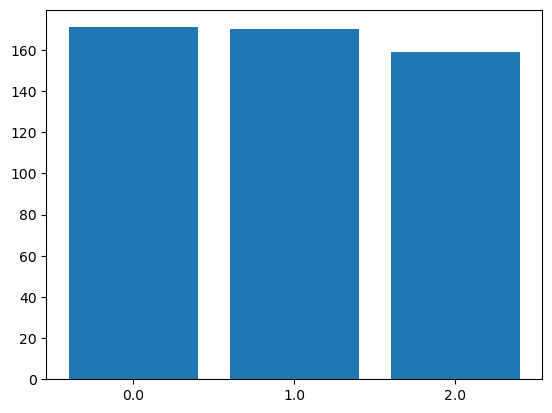

In [298]:
from matplotlib import pyplot as plt

# Write your code here. Add as many boxes as you need.
outc_counts = df.groupby("Outcome").size()

plt.bar(outc_counts.index.astype(str), outc_counts)
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [299]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum()/len(df)*100

Age                              5.0
Gender                           0.0
Diagnosis                        0.0
Symptom Severity (1-10)          0.0
Mood Score (1-10)                0.0
Sleep Quality (1-10)             0.0
Physical Activity (hrs/week)    10.0
Medication                       0.0
Therapy Type                     0.0
Treatment Duration (weeks)       0.0
Stress Level (1-10)             20.0
Outcome                          0.0
Treatment Progress (1-10)        0.0
AI-Detected Emotional State      0.0
Adherence to Treatment (%)       0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

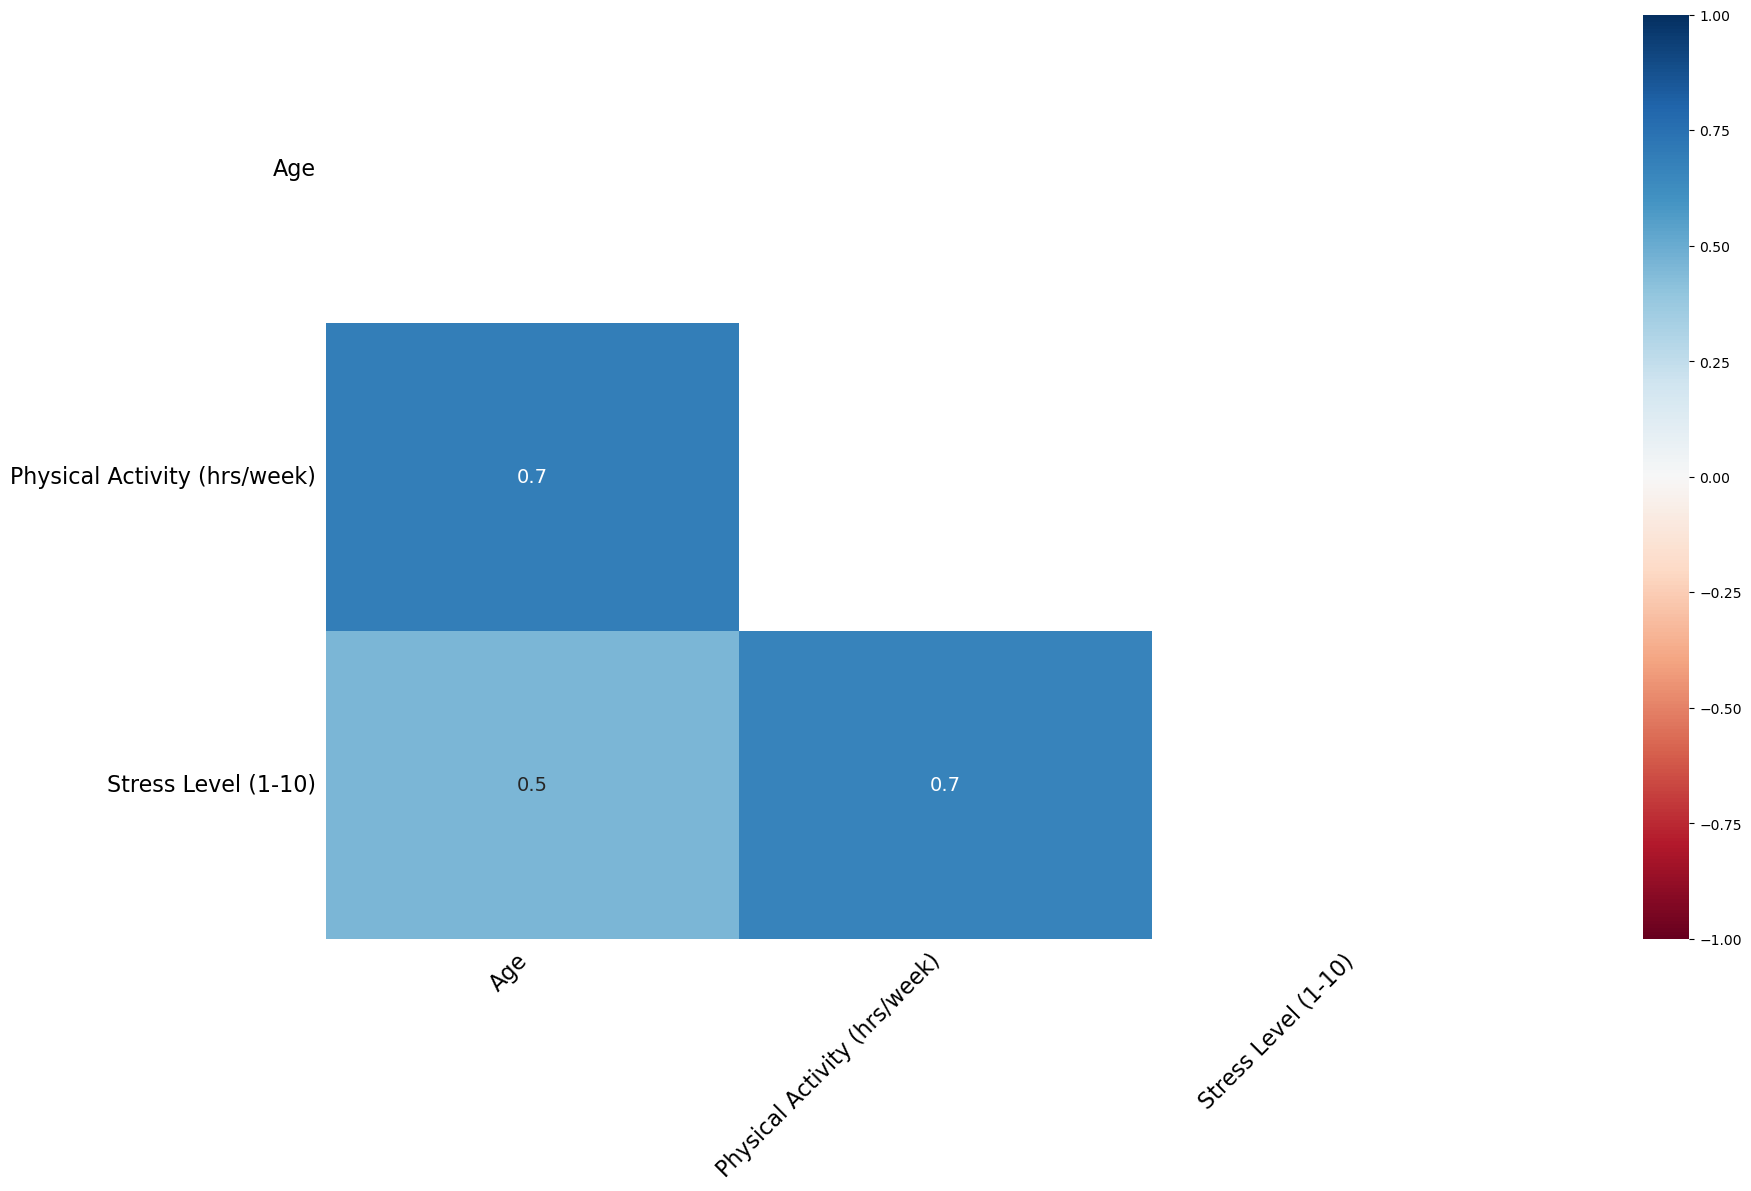

In [300]:
# Write your code here. Add as many boxes as you need.
import missingno as msno
msno.heatmap(df)

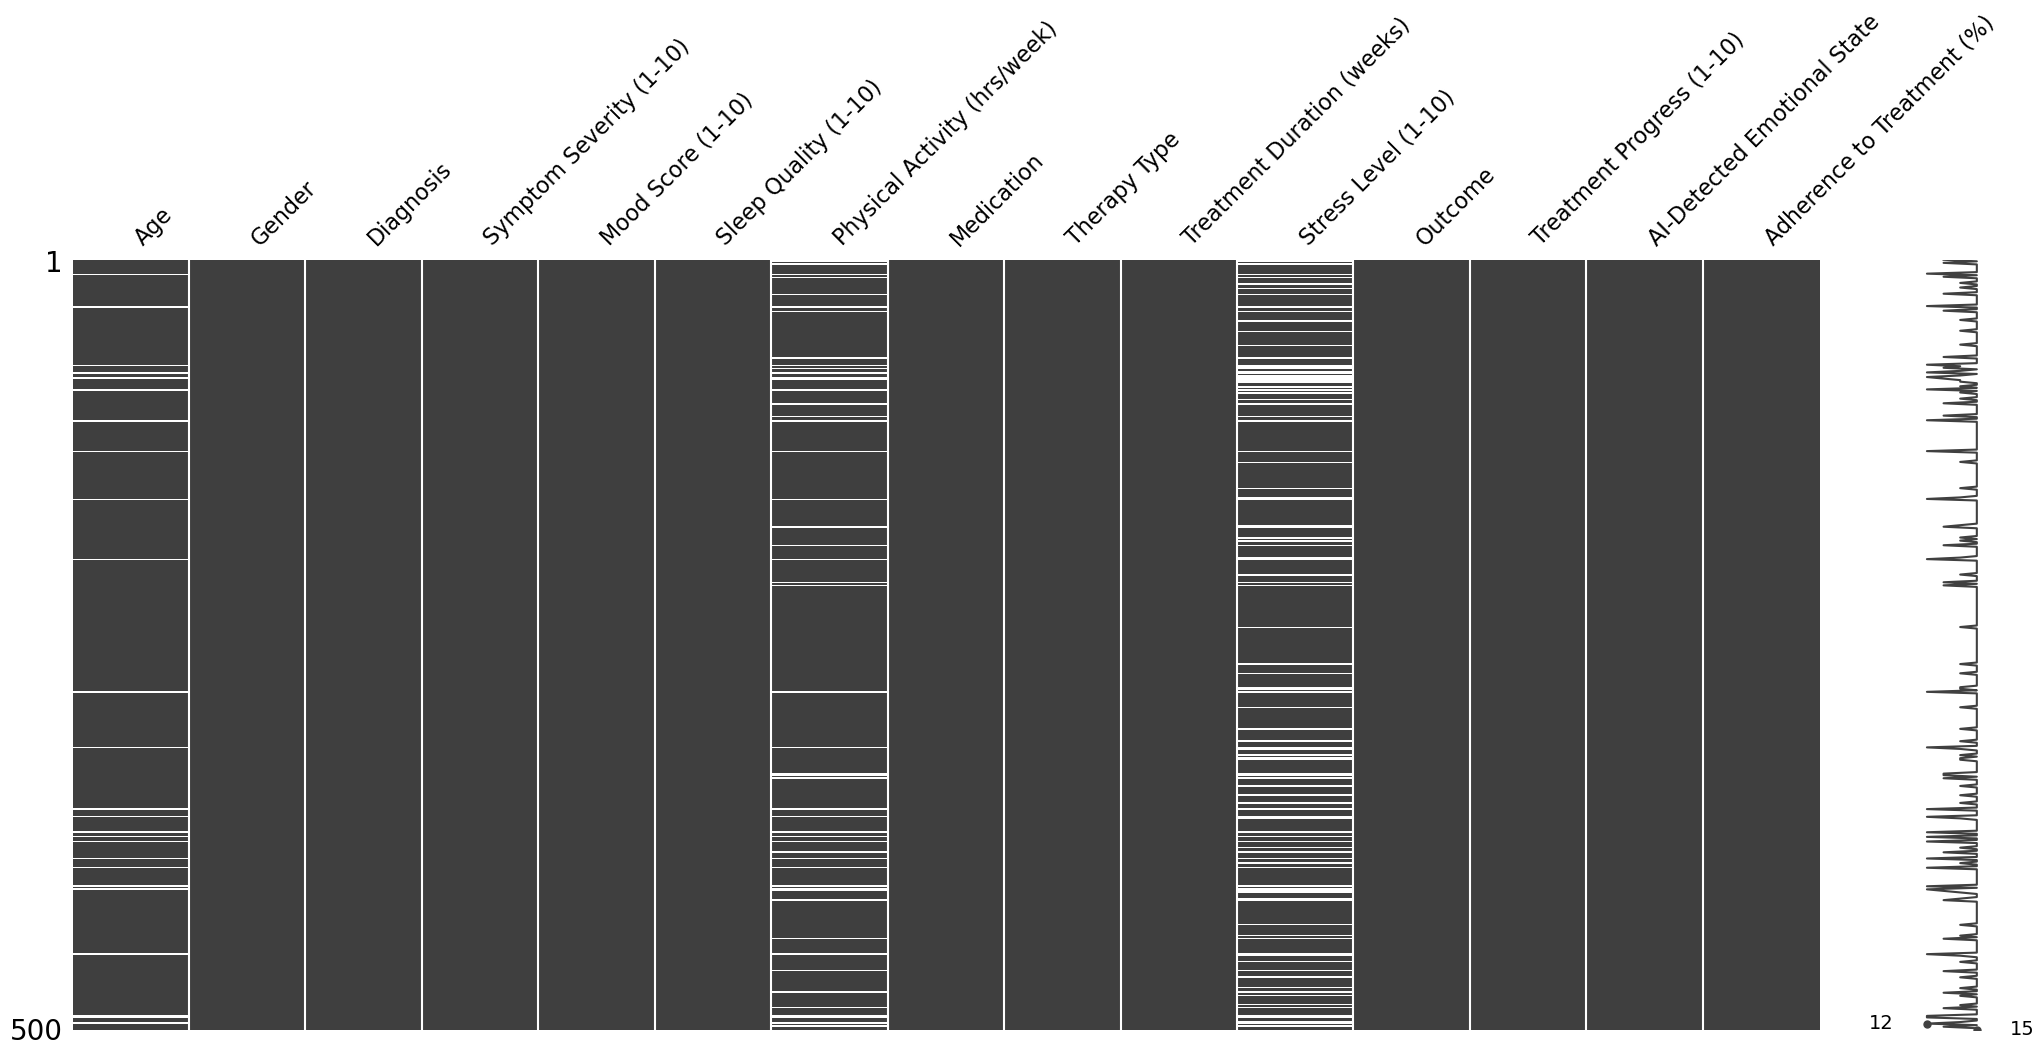

In [301]:
msno.matrix(df)
plt.show()

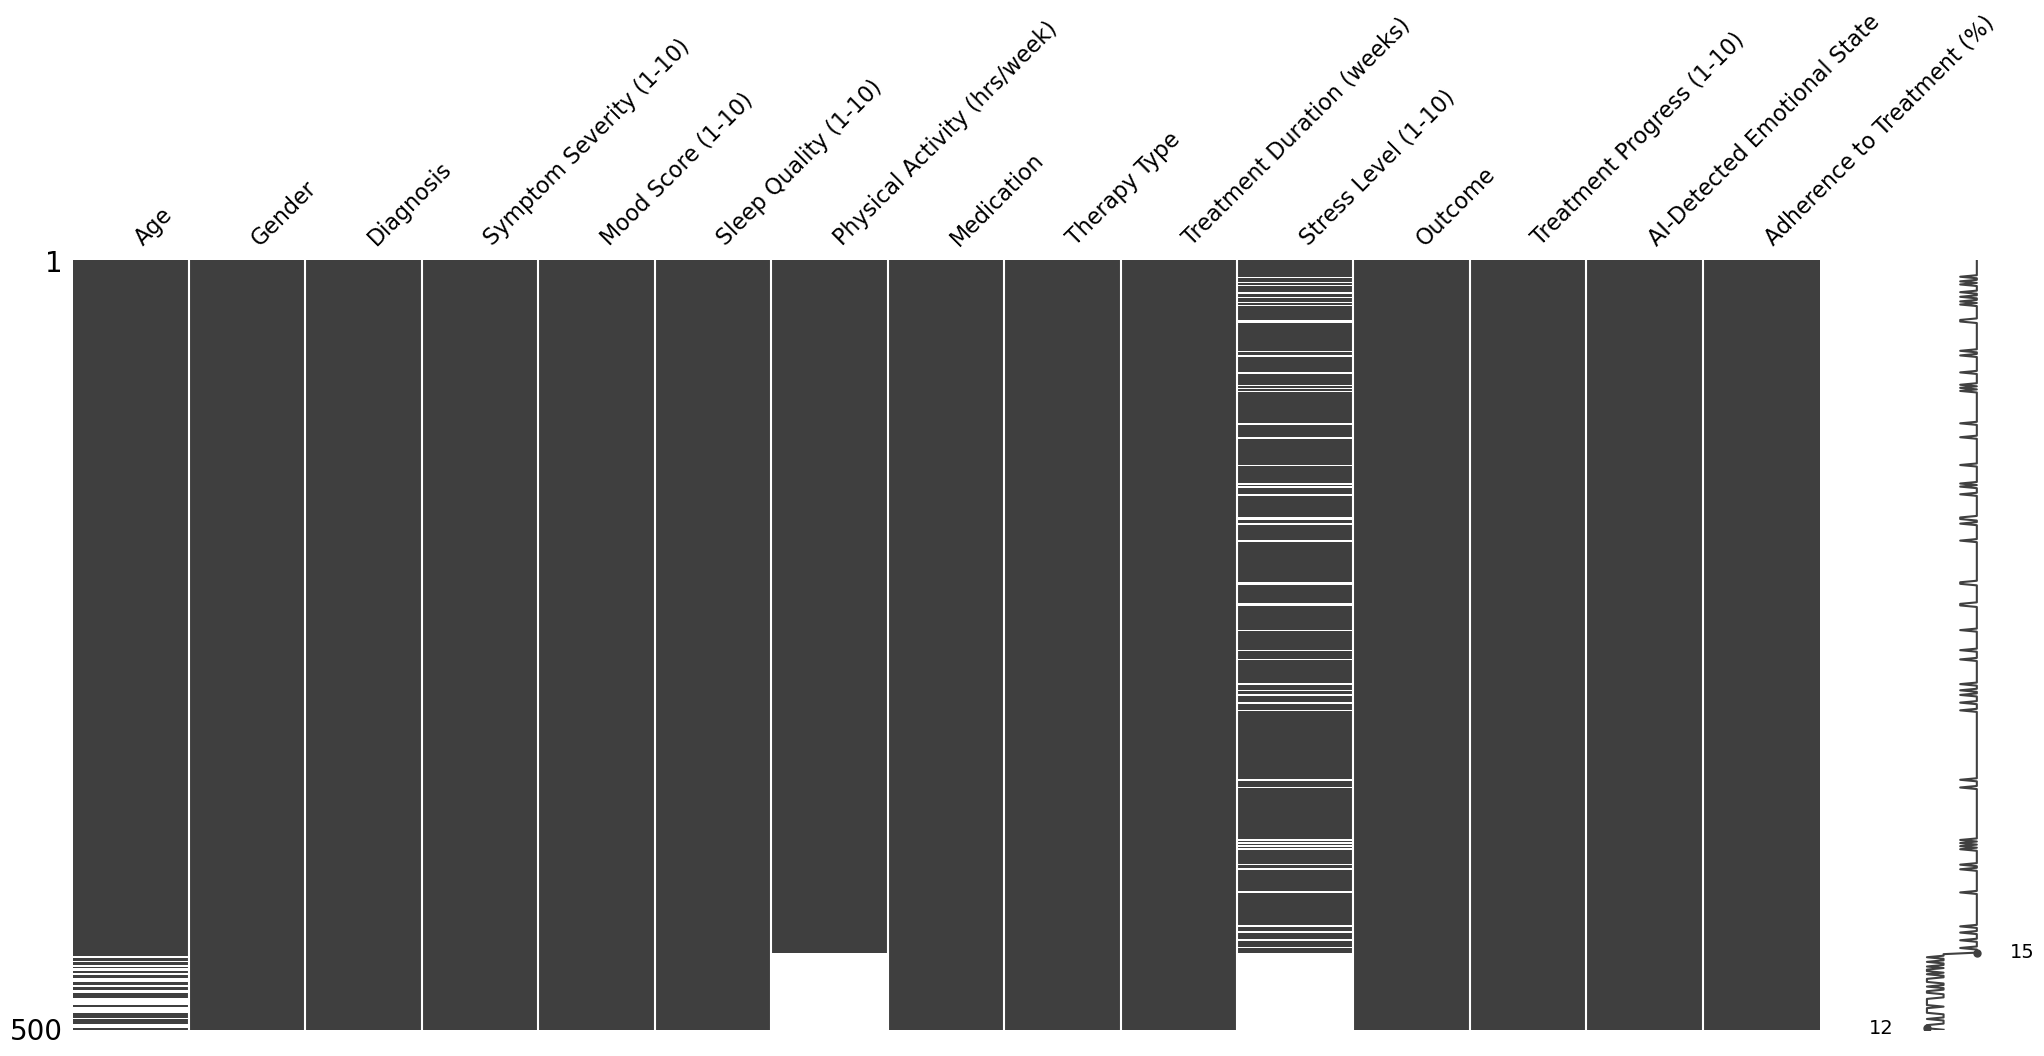

In [302]:
msno.matrix(df.sort_values('Physical Activity (hrs/week)'))
plt.show()

In [303]:
df["Physical Activity (hrs/week)"].corr(df["Stress Level (1-10)"])

0.029939682008548994

In [304]:
df = df.dropna(subset=["Age"],axis=0)

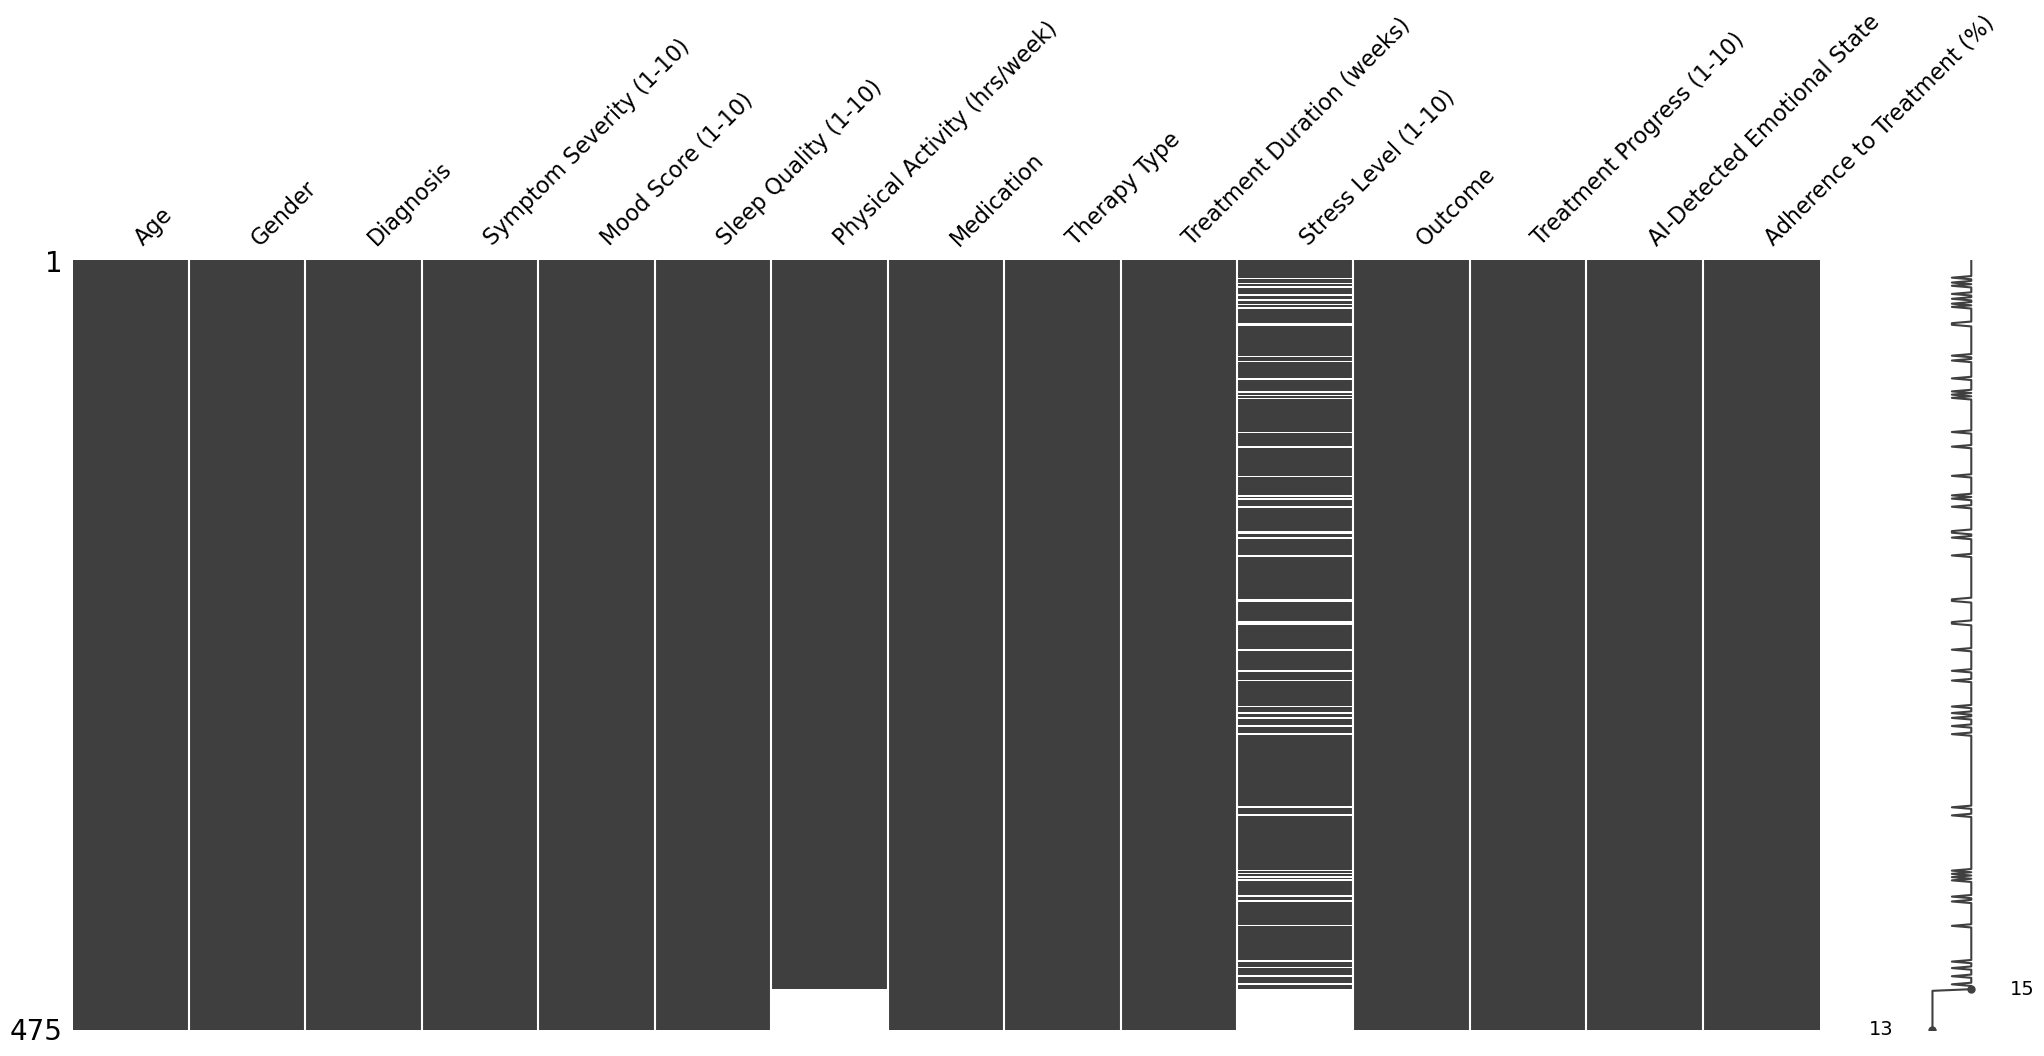

In [305]:
msno.matrix(df.sort_values('Physical Activity (hrs/week)'))
plt.show()

In [306]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Physical Activity (hrs/week)", 'Stress Level (1-10)',"Age","Gender"]])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

In [307]:
imputed_data = scaler.inverse_transform(imputed_data)

In [308]:
imputed_data

array([[ 8.4,  8.2, 43. ,  0. ],
       [ 7. ,  7. , 40. ,  0. ],
       [ 5.8,  6.8, 55. ,  0. ],
       ...,
       [ 5.4,  7.8, 23. ,  1. ],
       [ 9. ,  6. , 48. ,  1. ],
       [ 2. ,  6. , 58. ,  1. ]])

In [309]:
df[["Physical Activity (hrs/week)", 'Stress Level (1-10)',"Age","Gender"]] = imputed_data

/var/folders/vw/vz2n89y934nd5kyv4k0r6f980000gn/T/ipykernel_33605/2841133041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Physical Activity (hrs/week)", 'Stress Level (1-10)',"Age","Gender"]] = imputed_data


In [310]:
df.isnull().sum()

Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

## GORE Gi hendlnav

In [311]:
# Write your code here. Add as many boxes as you need.


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [312]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

#80:20
X = df.drop(columns=["Outcome"],axis=1)
Y = df["Outcome"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, shuffle=True)


In [322]:
Y

0      0.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
494    1.0
496    0.0
497    0.0
498    1.0
499    0.0
Name: Outcome, Length: 475, dtype: float64

## Feature Scaling
Standardize the features appropriately.

In [323]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
standard_scaler = StandardScaler()

In [324]:
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [326]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1)

In [327]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Use the trained model to make predictions for the test set.

In [328]:
Y_pred = model.predict(X_test)

In [329]:
from sklearn.metrics import accuracy_score

# Write your code here. Add as many boxes as you need.
accuracy_score(Y_test,Y_pred)


0.3473684210526316

Assess the performance of the model by using different classification metrics.

In [316]:
# Write your code here. Add as many boxes as you need.


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [317]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features appropriately.

In [318]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [319]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [320]:
# Write your code here. Add as many boxes as you need.